In [1]:
pip install librosa

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an MP3 file of your choosing into the file navigator on the left
filename = 'Daft_Punk.mp3'

# Load the audio file with a sample rate of 48kHz
y, sr = librosa.load('Daft_Punk.mp3', sr=48000)

# Extract features
# For example, let's extract the Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Display the shape of the MFCCs matrix
print("MFCCs shape:", mfccs.shape)


MFCCs shape: (20, 31854)


Text(0.5, 1.0, 'Waveform')

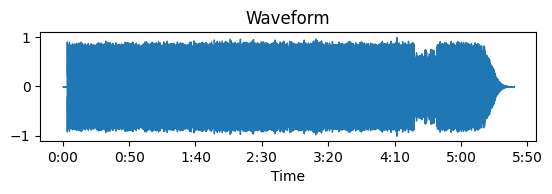

In [10]:
# Plot time-domain signal
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')

Text(0.5, 1.0, 'Magnitude Spectrum')

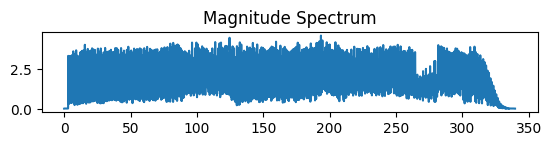

In [11]:
# Compute the magnitude spectrum
magnitude_spectrum = np.abs(librosa.stft(y))

# Plot magnitude spectrum
plt.subplot(4, 1, 4)
plt.plot(librosa.times_like(magnitude_spectrum), np.mean(magnitude_spectrum, axis=0))
plt.title('Magnitude Spectrum')

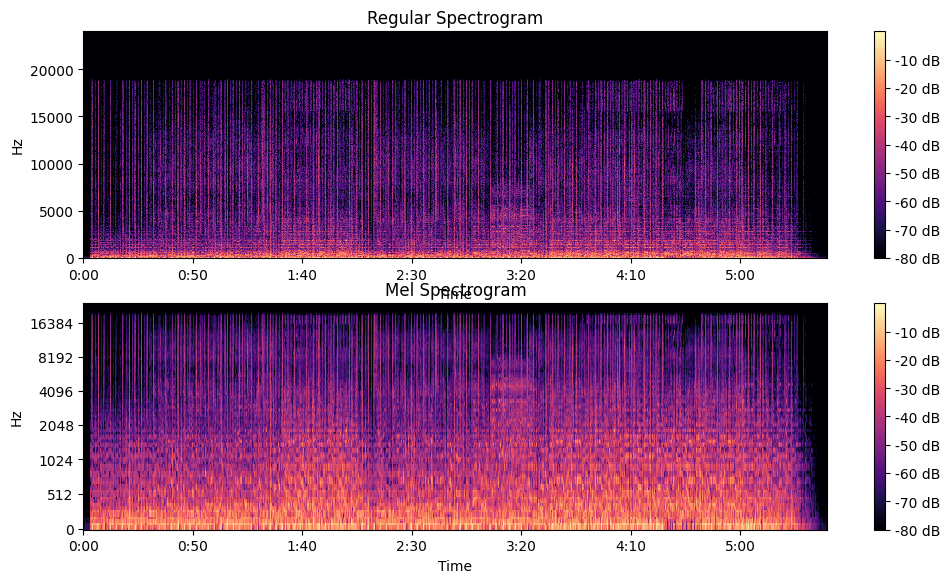

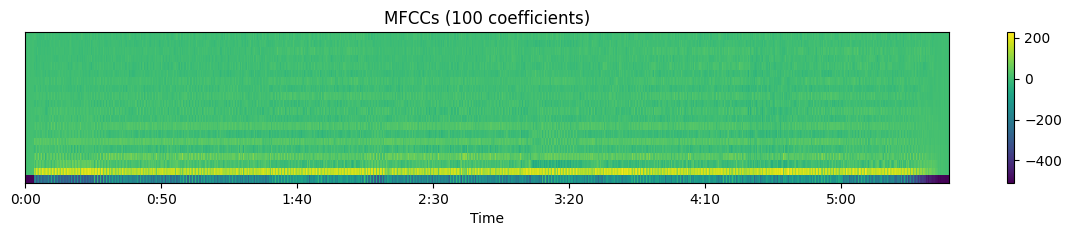

In [13]:
# Compute the spectrogram with a maximum frequency of 24000 Hz
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=512, fmax=24000)

# Convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Compute the regular spectrogram with a maximum frequency of 24000 Hz
D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
spectrogram_regular_db = librosa.amplitude_to_db(D, ref=np.max)

# Compute the MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Plot all visualizations
plt.figure(figsize=(12, 10))

# Plot regular spectrogram
plt.subplot(3, 1, 1)
librosa.display.specshow(spectrogram_regular_db, sr=sr, hop_length=512, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Regular Spectrogram')

# Plot Mel-frequency spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel', fmax=24000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

# Plot MFCCs with optimized parameters
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 3)
librosa.display.specshow(mfccs, sr=sr, x_axis='time', hop_length=512, cmap='viridis')
plt.colorbar()
plt.title('MFCCs (100 coefficients)')

plt.tight_layout()
plt.show()
